In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import scipy
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.optimize import minimize
import math
from scipy.optimize import Bounds
from scipy.stats import poisson
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import pacf
import matplotlib.dates as mdates


In [3]:
data_dir = os.path.join("data", "EnergyUsage.csv")
energy_data = pd.read_csv(data_dir, index_col = 'Timestamp')

In [4]:
# energy_data[['Energy', 'Unit']] = energy_data['OlinHall'].str.split('(?=k)', n=1, expand=True)
# energy_data['Energy'] = energy_data['Energy'].astype(float)

In [5]:
energy_data.index = pd.to_datetime(energy_data.index, format='mixed')

C:\Users\fenya\AppData\Local\Temp\ipykernel_21620\929962530.py:1: FutureWarning: Parsed string "2024-01-01 00:00:00 EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  energy_data.index = pd.to_datetime(energy_data.index, format='mixed')
C:\Users\fenya\AppData\Local\Temp\ipykernel_21620\929962530.py:1: FutureWarning: Parsed string "2024-01-02 00:00:00 EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  energy_data.index = pd.to_datetime(energy_data.index, format='mixed')
C:\Users\fenya\AppData\Local\Temp\ipykernel_21620\929962530.py:1: FutureWarning: Parsed string "2024-01-03 00:00:00 EST" included an un-recognized timez

In [ ]:
data_dir = os.path.join("data", "EnergyUsage2.csv")
energy_data = pd.read_csv(data_dir)
energy_data[['Time','Zone']]= energy_data['ts'].str.split(' ', n=1, expand=True)
energy_data = energy_data.set_index('Time')
energy_data[['Energy', 'Unit']] = energy_data['BakerLab'].str.split('(?=k)', n=1, expand=True)
energy_data['Energy'] = energy_data['Energy'].astype(float)

C:\Users\fenya\AppData\Local\Temp\ipykernel_9648\2397504086.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  energy_data.index = pd.to_datetime(energy_data.index, format='mixed')


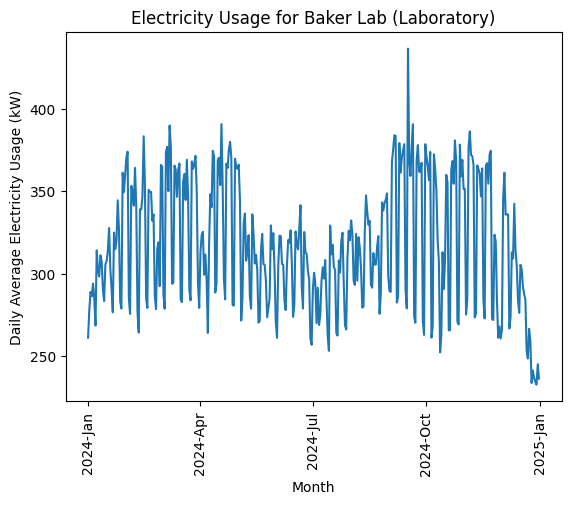

In [ ]:
data_dir = os.path.join("data", "EnergyUsage2.csv")
energy_data = pd.read_csv(data_dir)
energy_data[['Time','Zone']]= energy_data['ts'].str.split(' ', n=1, expand=True)
energy_data = energy_data.set_index('Time')
energy_data[['Energy', 'Unit']] = energy_data['BakerLab'].str.split('(?=k)', n=1, expand=True)
energy_data['Energy'] = energy_data['Energy'].astype(float)
energy_data.index = pd.to_datetime(energy_data.index, format='mixed')



ax = plt.gca()
# start by your date and then your data
ax.plot(energy_data["Energy"]) # daily data
# You can change the step of range() as you prefer (now, it selects each third month) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3)))
# you can change the format of the label (now it is 2016-Jan)  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.setp(ax.get_xticklabels(), rotation=90) 
plt.xlabel('Month')
plt.ylabel('Daily Average Electricity Usage (kW)')
plt.title('Electricity Usage for Baker Lab (Laboratory)')
# plt.show()
plt.savefig('lab.png')


C:\Users\fenya\AppData\Local\Temp\ipykernel_9648\2107807933.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  energy_data.index = pd.to_datetime(energy_data.index, format='mixed')


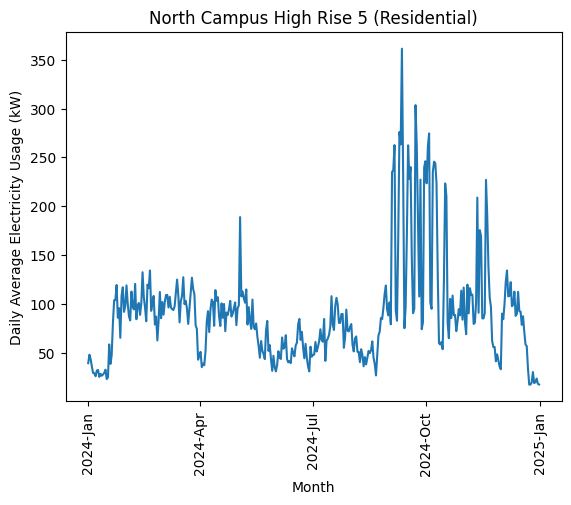

In [ ]:
data_dir = os.path.join("data", "EnergyUsage2.csv")
energy_data = pd.read_csv(data_dir)
energy_data[['Time','Zone']]= energy_data['ts'].str.split(' ', n=1, expand=True)
energy_data = energy_data.set_index('Time')
energy_data[['Energy', 'Unit']] = energy_data['NorthCampusHighRise5'].str.split('(?=k)', n=1, expand=True)
energy_data['Energy'] = energy_data['Energy'].astype(float)
energy_data.index = pd.to_datetime(energy_data.index, format='mixed')



ax = plt.gca()
# start by your date and then your data
ax.plot(energy_data["Energy"]) # daily data
# You can change the step of range() as you prefer (now, it selects each third month) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3)))
# you can change the format of the label (now it is 2016-Jan)  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.setp(ax.get_xticklabels(), rotation=90) 
plt.xlabel('Month')
plt.ylabel('Daily Average Electricity Usage (kW)')
plt.title('North Campus High Rise 5 (Residential)')
# plt.show()
plt.savefig('resid.png')

In [ ]:
data_dir = os.path.join("data", "WeatherDegreeDays.csv")
weather_data = pd.read_csv(data_dir)
weather_data[['Time','Zone']]= weather_data['ts'].str.split(' ', n=1, expand=True)
weather_data = weather_data.set_index('Time')
weather_data.index = pd.to_datetime(weather_data.index, format='mixed')

C:\Users\fenya\AppData\Local\Temp\ipykernel_9648\617068065.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather_data.index = pd.to_datetime(weather_data.index, format='mixed')


In [ ]:
weather_data

,ts,"Ithaca, NY, United States Heating Degree Days","Ithaca, NY, United States Cooling Degree Days",Zone
Time,,,,
2024-01-01 00:00:00-05:00,2024-01-01T00:00:00-05:00 New_York,31.958333,0.0,New_York
2024-01-02 00:00:00-05:00,2024-01-02T00:00:00-05:00 New_York,35.166667,0.0,New_York
2024-01-03 00:00:00-05:00,2024-01-03T00:00:00-05:00 New_York,31.083333,0.0,New_York
2024-01-04 00:00:00-05:00,2024-01-04T00:00:00-05:00 New_York,37.208333,0.0,New_York
2024-01-05 00:00:00-05:00,2024-01-05T00:00:00-05:00 New_York,39.291667,0.0,New_York
...,...,...,...,...
2024-12-27 00:00:00-05:00,2024-12-27T00:00:00-05:00 New_York,36.625000,0.0,New_York
2024-12-28 00:00:00-05:00,2024-12-28T00:00:00-05:00 New_York,29.458333,0.0,New_York
2024-12-29 00:00:00-05:00,2024-12-29T00:00:00-05:00 New_York,26.125000,0.0,New_York


In [ ]:
energy_data.shape

(366, 6)

In [ ]:
weather_data

,ts,"Ithaca, NY, United States Heating Degree Days","Ithaca, NY, United States Cooling Degree Days",Zone
Time,,,,
2024-01-01 00:00:00-05:00,2024-01-01T00:00:00-05:00 New_York,31.958333,0.0,New_York
2024-01-02 00:00:00-05:00,2024-01-02T00:00:00-05:00 New_York,35.166667,0.0,New_York
2024-01-03 00:00:00-05:00,2024-01-03T00:00:00-05:00 New_York,31.083333,0.0,New_York
2024-01-04 00:00:00-05:00,2024-01-04T00:00:00-05:00 New_York,37.208333,0.0,New_York
2024-01-05 00:00:00-05:00,2024-01-05T00:00:00-05:00 New_York,39.291667,0.0,New_York
...,...,...,...,...
2024-12-27 00:00:00-05:00,2024-12-27T00:00:00-05:00 New_York,36.625000,0.0,New_York
2024-12-28 00:00:00-05:00,2024-12-28T00:00:00-05:00 New_York,29.458333,0.0,New_York
2024-12-29 00:00:00-05:00,2024-12-29T00:00:00-05:00 New_York,26.125000,0.0,New_York


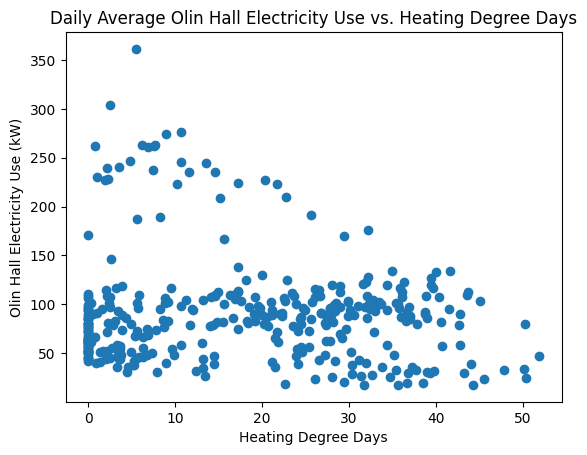

In [ ]:
plt.scatter(weather_data['Ithaca, NY, United States Heating Degree Days'], energy_data["Energy"])
plt.xlabel('Heating Degree Days')
plt.ylabel('Olin Hall Electricity Use (kW)')
plt.title('Daily Average Olin Hall Electricity Use vs. Heating Degree Days')
# plt.show()
plt.savefig('elec_vs_hdd.png')

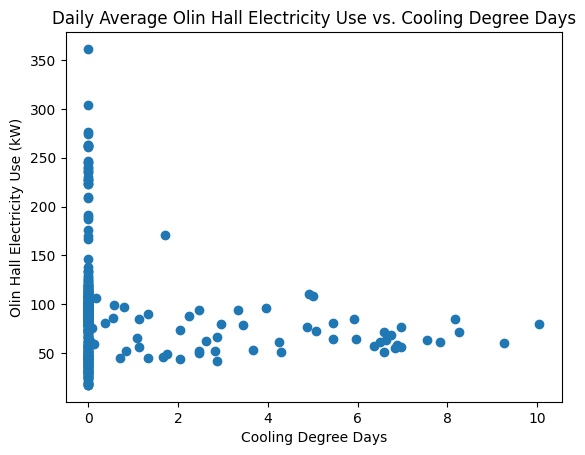

In [ ]:
plt.scatter(weather_data['Ithaca, NY, United States Cooling Degree Days'], energy_data["Energy"])
plt.xlabel('Cooling Degree Days')
plt.ylabel('Olin Hall Electricity Use (kW)')
plt.title('Daily Average Olin Hall Electricity Use vs. Cooling Degree Days')
# plt.show()
plt.savefig('elec_vs_cdd.png')

In [5]:
data_dir = os.path.join("data", "EnergyUsageAll.csv")
energy_data = pd.read_csv(data_dir)
energy_data[['Time','Zone']]= energy_data['ts'].str.split(' ', n=1, expand=True)
energy_data = energy_data.set_index('Time')
energy_data.index = pd.to_datetime(energy_data.index, format='mixed')

C:\Users\fenya\AppData\Local\Temp\ipykernel_6684\1208847523.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  energy_data.index = pd.to_datetime(energy_data.index, format='mixed')


In [9]:
data_dir = os.path.join("data", "WeatherHistorical.csv")
weather_data = pd.read_csv(data_dir)
weather_data[['Time','Zone']]= weather_data['Timestamp'].str.split(' ', n=1, expand=True)
weather_data = weather_data.set_index('Time')
weather_data.index = pd.to_datetime(weather_data.index, format='mixed')

col = 'Ithaca, NY, United States Humidity'
weather_data[col] = (weather_data[col] - weather_data[col].mean())/weather_data[col].std()

col = 'Ithaca, NY, United States Temp'
weather_data[col] = (weather_data[col] - weather_data[col].mean())/weather_data[col].std()

C:\Users\fenya\AppData\Local\Temp\ipykernel_6684\4084514803.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather_data.index = pd.to_datetime(weather_data.index, format='mixed')


In [ ]:
data_dir = os.path.join("data", "WeatherDegreeDays.csv")
wdd_data = pd.read_csv(data_dir)
wdd_data[['Time','Zone']]= wdd_data['ts'].str.split(' ', n=1, expand=True)
wdd_data = wdd_data.set_index('Time')
wdd_data.index = pd.to_datetime(wdd_data.index, format='mixed')

col = 'Ithaca, NY, United States Heating Degree Days'
wdd_data[col] = (wdd_data[col] - wdd_data[col].mean())/wdd_data[col].std()

col = 'Ithaca, NY, United States Cooling Degree Days'
wdd_data[col] = (wdd_data[col] - wdd_data[col].mean())/wdd_data[col].std()

In [ ]:
weather_data = weather_data.drop(weather_data.index.difference(energy_data.index))
wdd_data = wdd_data.drop(wdd_data.index.difference(energy_data.index))
energy_data = energy_data.drop(energy_data.index.difference(weather_data.index))

In [73]:
wdd_data

,ts,"Ithaca, NY, United States Heating Degree Days","Ithaca, NY, United States Cooling Degree Days",Zone
Time,,,,
2024-01-01 00:00:00-05:00,2024-01-01T00:00:00-05:00 New_York,1.005603,-0.348453,New_York
2024-01-02 00:00:00-05:00,2024-01-02T00:00:00-05:00 New_York,1.228768,-0.348453,New_York
2024-01-03 00:00:00-05:00,2024-01-03T00:00:00-05:00 New_York,0.944740,-0.348453,New_York
2024-01-04 00:00:00-05:00,2024-01-04T00:00:00-05:00 New_York,1.370782,-0.348453,New_York
2024-01-05 00:00:00-05:00,2024-01-05T00:00:00-05:00 New_York,1.515694,-0.348453,New_York
...,...,...,...,...
2024-12-27 00:00:00-05:00,2024-12-27T00:00:00-05:00 New_York,1.330206,-0.348453,New_York
2024-12-28 00:00:00-05:00,2024-12-28T00:00:00-05:00 New_York,0.831708,-0.348453,New_York
2024-12-29 00:00:00-05:00,2024-12-29T00:00:00-05:00 New_York,0.599849,-0.348453,New_York


In [77]:
wdd_data.index = pd.to_datetime(wdd_data.index)

C:\Users\fenya\AppData\Local\Temp\ipykernel_6684\2494251210.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  wdd_data.index = pd.to_datetime(wdd_data.index)


In [ ]:
# wdd_data_hourly =  wdd_data.resample('H').ffill() # Resample to hourly, taking the mean

C:\Users\fenya\AppData\Local\Temp\ipykernel_6684\3197744879.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  wdd_data_hourly =  wdd_data.resample('H') # Resample to hourly, taking the mean


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# wdd_data_hourly = wdd_data.index.resample('1H').pad()

AttributeError: 'Index' object has no attribute 'resample'

In [11]:
params = [2,3,4]

In [13]:
params[:-1]

[2, 3]

In [14]:
weather_data['Ithaca, NY, United States Temp'].index

Index([2024-01-01 00:00:00-05:00, 2024-01-01 01:00:00-05:00,
       2024-01-01 02:00:00-05:00, 2024-01-01 03:00:00-05:00,
       2024-01-01 04:00:00-05:00, 2024-01-01 05:00:00-05:00,
       2024-01-01 06:00:00-05:00, 2024-01-01 07:00:00-05:00,
       2024-01-01 08:00:00-05:00, 2024-01-01 09:00:00-05:00,
       ...
       2024-12-31 14:00:00-05:00, 2024-12-31 15:00:00-05:00,
       2024-12-31 16:00:00-05:00, 2024-12-31 17:00:00-05:00,
       2024-12-31 18:00:00-05:00, 2024-12-31 19:00:00-05:00,
       2024-12-31 20:00:00-05:00, 2024-12-31 21:00:00-05:00,
       2024-12-31 22:00:00-05:00, 2024-12-31 23:00:00-05:00],
      dtype='object', name='Time', length=8760)

In [16]:
all(weather_data.index == energy_data.index)

True

In [17]:
params = [2,5]

In [18]:
params = [2,4]
params_extended = [1]
params_extended.extend(params)

In [19]:
params_extended

[1, 2, 4]

In [20]:
pd.Series([1, params])

0         1
1    [2, 4]
dtype: object

In [22]:
energy_data = energy_data.drop(['ts','Zone'], axis=1)


In [23]:
y = energy_data.to_numpy().reshape(-1, 1)
nan_data = (np.isnan(y))
y =y[~nan_data].reshape(-1, 1)  

humid = np.repeat(weather_data.iloc[:,[2]], energy_data.shape[1]).reshape(-1, 1)[~nan_data].reshape(-1, 1)  
temp = np.repeat(weather_data.iloc[:,[4]], energy_data.shape[1]).reshape(-1, 1)[~nan_data].reshape(-1, 1)  
# sites = np.tile(df.columns, df.shape[0])

# x_lat =x_lat.reshape(-1, 1)[~nan_data].reshape(-1, 1)
# x_lon =x_lon.reshape(-1, 1)[~nan_data].reshape(-1, 1)

In [24]:
X = np.concatenate((humid, temp), axis=1)

In [25]:
pd.Series(y.reshape(-1,))

0          108.699997
1          141.248734
2           42.200001
3          343.424988
4          216.149994
              ...    
1257897     38.083332
1257898    112.606277
1257899     59.755001
1257900     78.445000
1257901    160.264999
Length: 1257902, dtype: float64

In [26]:
X[:,1]

array([-0.79519334, -0.79519334, -0.79519334, ..., -0.73475097,
       -0.73475097, -0.73475097], shape=(1257902,))

In [27]:
X

array([[ 1.22602277, -0.79519334],
       [ 1.22602277, -0.79519334],
       [ 1.22602277, -0.79519334],
       ...,
       [ 0.3867467 , -0.73475097],
       [ 0.3867467 , -0.73475097],
       [ 0.3867467 , -0.73475097]], shape=(1257902, 2))

In [28]:
params = [2,4,5,10]
σ = params[-1]
# params_extended = [1]
# params_extended.extend(params[:-1])
μ = pd.DataFrame(X*params[1:-1]).sum(axis=1) + params[0]
ll = np.sum(norm.logpdf(pd.Series(y.reshape(-1,)), μ, scale=σ))

In [29]:
ll

np.float64(-275134010.89838433)

In [30]:
params = [2,4,5,10]

In [31]:
def electricity_linear_model(params, X):
    μ = pd.DataFrame(X*params[1:-1]).sum(axis=1) + params[0]
    return μ

<Axes: >

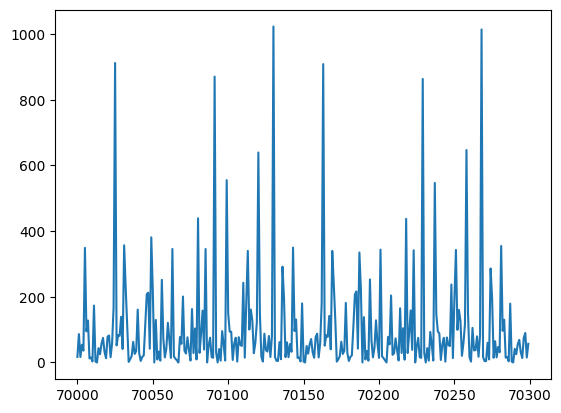

In [48]:
pd.Series(y.reshape(-1,))[70000:70300].plot()

In [33]:
def electricity_demand_model(params, X, y):
    σ = params[-1]
    μ = electricity_linear_model(params, X)
    ll = np.sum(norm.logpdf(pd.Series(y.reshape(-1,)), μ, scale=σ))  # compute log-likelihood
    return ll

In [34]:
lb = [-1000000.0, -1000000.0, -1000000.0, -1000000.0]
ub = [1000000.0, 1000000.0, 1000000.0, 1000000.0]
init = [0.5, 0.5, 0.5, 0.5]

result = minimize(lambda θ: -electricity_demand_model(θ, X, y), init, bounds=list(zip(lb, ub)))
θ_mle = result.x

<Axes: >

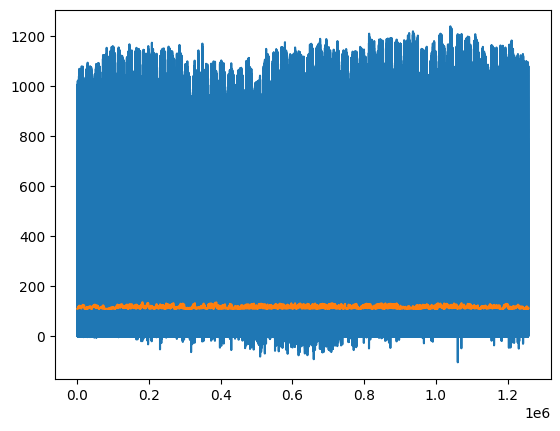

In [49]:
plt.plot(y)
electricity_linear_model(θ_mle, X).plot()

In [53]:
θ_mle

array([116.86597155,  -5.46447531,   0.32343997, 172.6830115 ])

<Axes: >

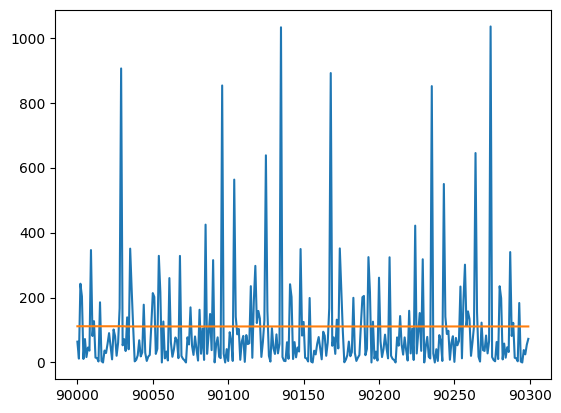

In [52]:
pd.Series(y.reshape(-1,))[90000:90300].plot()
electricity_linear_model(θ_mle, X)[90000:90300].plot()

In [38]:
θ_mle

array([116.86597155,  -5.46447531,   0.32343997, 172.6830115 ])

In [39]:
θ_mle

array([116.86597155,  -5.46447531,   0.32343997, 172.6830115 ])

In [40]:
electricity_demand_model(θ_mle, X, y)

np.float64(-8264901.030637088)

In [41]:
X = weather_data['Ithaca, NY, United States Temp'].values
y = 
electricity_demand_model(params, X, y)

SyntaxError: invalid syntax (154935579.py, line 2)

In [ ]:
def electricity_demand_model(params, X, y):
    β_0, β_1 = params
    λ = np.exp(β_0 + β_1 * pctcover)
    loglik = np.sum(normal.logpmf(salaman_data, λ))
    return loglik

With AR(1) residuals

In [100]:
def electricity_linear_model(params, X):
    μ = pd.DataFrame(X*params[1:-2]).sum(axis=1) + params[0]
    return μ

In [101]:
def elec_loglik(params, X, y):
    ρ = params[-1]
    σ = params[-2]
    elec_sim = electricity_linear_model(params, X)
    residuals = (y - elec_sim).values
    elec_error = 0
    # ll = np.sum(norm.logpdf(gmsl_data, loc=y, scale=np.sqrt(σ**2+gmsl_error**2)))  # compute log-likelihood
    T = len(y)
    ll = 0  # initialize log-likelihood counter
    for t in range(len(elec_sim)):
        if t == 0:
            ll += norm.logpdf(residuals[0], loc=0, scale=np.sqrt(σ**2 / (1 - ρ**2) + elec_error.values[0]**2))
        else:
            resid_wn = residuals[t] - ρ * residuals[t-1]
            ll += norm.logpdf(resid_wn, loc=0, scale=np.sqrt(σ**2 + elec_error.values[t]**2))

    return ll

In [102]:
lb = [-1000000.0, -1000000.0, -1000000.0, -1000000.0, -0.99]
ub = [1000000.0, 1000000.0, 1000000.0, 1000000.0, 0.99]
init = [0.5, 0.5, 0.5, 0.1, 0.1]

result = minimize(lambda θ: -electricity_demand_model(θ, X, y), init, bounds=list(zip(lb, ub)))
θ_mle = result.x

In [103]:
np.sqrt(0 / (1 -θ_mle[-1]**2))

np.float64(0.0)

In [104]:
(1 -θ_mle[-1]**2)

np.float64(0.01990000000000003)

In [ ]:
n = 1000
# get iid and AR residuals from relevant processes
# residuals_iid = np.stack([np.random.normal(0, np.sqrt(temp_sd[i]**2 + θ_iid[-1]**2), n) for i in range(len(temp_sd))], axis=0)
residuals_ar = np.zeros((len(y), n))
elec_error = 0
for t in range(len(y)):
    if t == 0:
        residuals_ar[t, :] = np.random.normal(0, np.sqrt(θ_mle[-2]**2 / (1 -θ_mle[-1]**2) + elec_error**2), n)
    else:
        residuals_ar[t, :] =θ_mle[-2] * residuals_ar[t-1, :] + np.random.normal(0, np.sqrt(θ_mle[-2]**2 + elec_error**2), n)


In [106]:
np.random.normal(0, np.sqrt(θ_mle[-2]**2 / (1 -θ_mle[-1]**2) + elec_error**2), n)

array([ 0.67303508,  0.75414098,  0.7592718 , -0.90580637, -0.06250475,
       -0.02853224, -0.78379787,  0.59015215,  0.313648  , -1.10630921])

<Axes: >

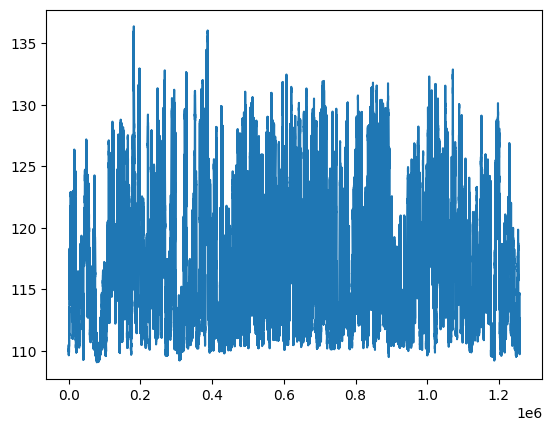

In [109]:
sim_out = electricity_linear_model(θ_mle, X)

(sim_out + residuals_ar[:,1]).plot()

<Axes: >

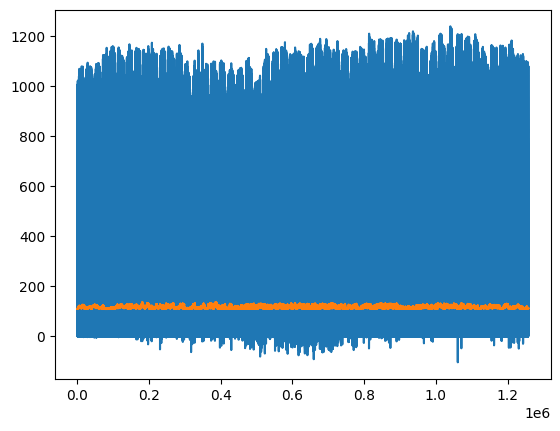

In [113]:
sim_out = electricity_linear_model(θ_mle, X) + residuals_ar[:,1]
pd.Series(y.reshape(-1,)).plot()
sim_out.plot()

<Axes: >

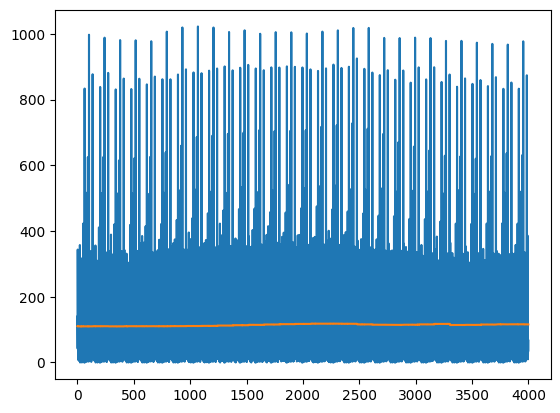

In [114]:
s = 0
e = 4000
sim_out = electricity_linear_model(θ_mle, X) + residuals_ar[:,1]
pd.Series(y.reshape(-1,))[s:e].plot()
sim_out[s:e].plot()

In [ ]:
result = minimize(lambda θ: -electricity_demand_model(θ, X, y), init, bounds=list(zip(lb, ub)))
θ_mle = result.x

In [ ]:
boot_params = np.zeros((n, len(params)))
for iter in range(n):
    optim_out = minimize(lambda θ: -electricity_demand_model(θ, X, y+ residuals_ar[:, iter]), init, bounds=list(zip(lb, ub)))
    boot_params[iter, :] = optim_out.x

In [ ]:
# q_boot_coefficient = 2 * p_mle[2] - np.quantile(boot_params[:, 2], [0.975, 0.025])


references 


https://stackoverflow.com/questions/71270630/how-to-show-only-the-monthly-ticks-in-the-x-axis-when-using-dataframe-plot